## **Whole Network Entropy**


### **Load in data**

In [ ]:
exp_data <- read.csv('/content/X.csv', header=FALSE)
metadata <-read.csv('/content/obs.csv')
var_data<- read.csv('/content/var.csv')

rownames(exp_data)<-metadata$CellID
colnames(exp_data)<-var_data$Gene


### **Create Metadata and Expression data for the 3 cell types; Secretory Epithelial-1, Secretory Epithelial-2, STIC lesion**:

In this step, we assess the transcriptomic complexity and potential differentiation state of the epithelial subpopulations by calculating Shannon Entropy. Using the BioQC package, we implemented a bootstrapping strategy to handle varying cluster sizes: for each cell type (Secretory Epithelial-1, Secretory Epithelial-2, and STIC lesion), we performed 100 iterations of randomly sampling 50 cells and calculating the entropy of their gene expression profiles. Shannon entropy in this context serves as a quantitative measure of transcriptomic diversity; higher entropy levels are often associated with increased cellular plasticity, stemness, or the dysregulated gene expression programs typical of malignancy. The results are aggregated and visualized in a comparative boxplot, enabling a direct statistical comparison of the transcriptional uncertainty between healthy, precursor, and cancer-associated states.

In [ ]:
install.packages("dplyr")
library(dplyr)
metadata_SE1 <- metadata[metadata$Celltype %in% c('Secretory Epithelial-1'),]
exp_data_SE1 <- exp_data[rownames(exp_data) %in% metadata_SE1$CellID,]

metadata_SE2 <- metadata[metadata$Celltype %in% c('Secretory Epithelial-2'),]
exp_data_SE2 <- exp_data[rownames(exp_data) %in% metadata_SE2$CellID,]

metadata_STIC <- metadata[metadata$Celltype %in% c('STIC lesion'),]
exp_data_STIC <- exp_data[rownames(exp_data) %in% metadata_STIC$CellID,]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Entropy Analysis**

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("BioQC")
library(BioQC)

exp_data_SE1 <- t(exp_data_SE1)
exp_data_SE2 <- t(exp_data_SE2)
exp_data_STIC <- t(exp_data_STIC)

compilation_SE1 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_SE1), 50, replace=FALSE)
  test <- exp_data_SE1[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_SE1 <- rbind(compilation_SE1, samples)
}

compilation_SE2 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_SE2), 50, replace=FALSE)
  test <- exp_data_SE2[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_SE2 <- rbind(compilation_SE2, samples)
}

compilation_STIC <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_STIC), 50, replace=FALSE)
  test <- exp_data_STIC[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_STIC <- rbind(compilation_STIC, samples)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'BioQC'”
Old packages: 'blob', 'cpp11', 'data.table', 'gert', 'knitr', 'later',
  'lifecycle', 'purrr', 'rappdirs', 'Rcpp', 'rlang', 'rstudioapi', 'selectr',
  'survival', 'testthat', 'tibble', 'tidyr', 'uuid', 'vctrs', 'xfun', 'xml2',
  'yaml'



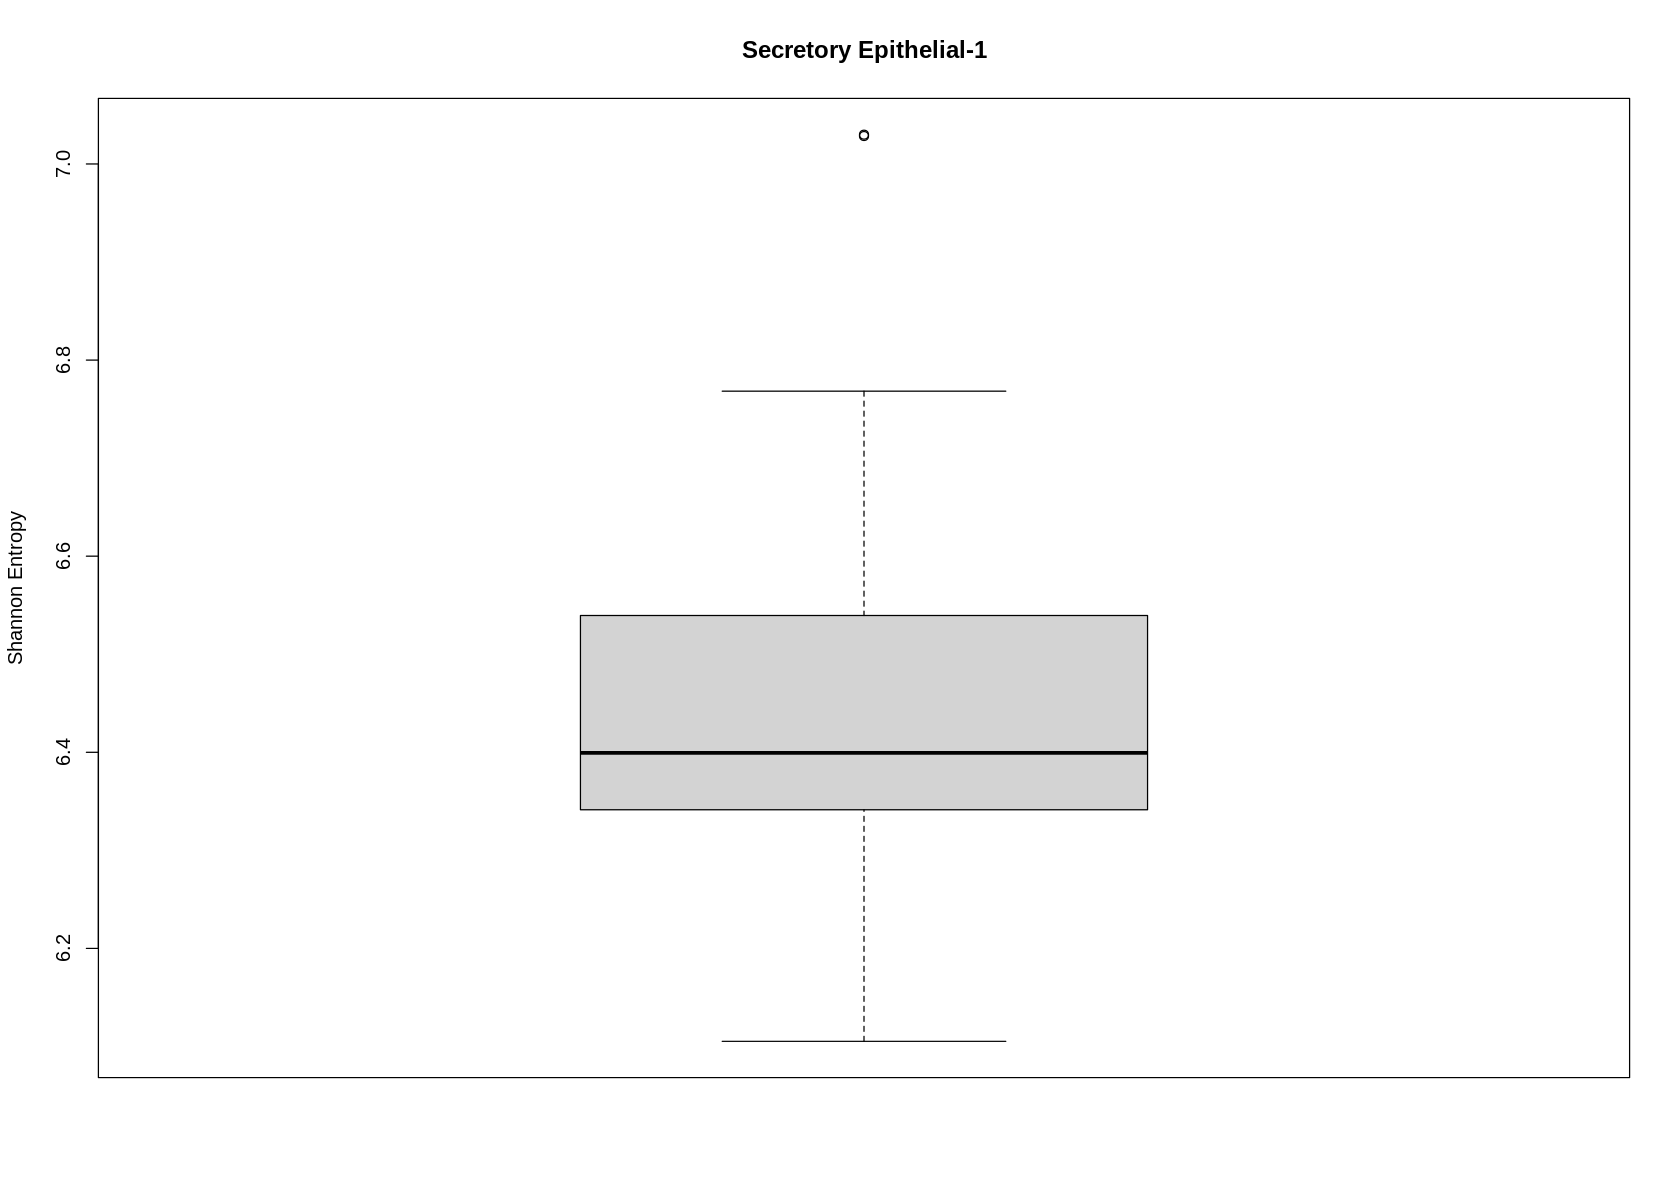

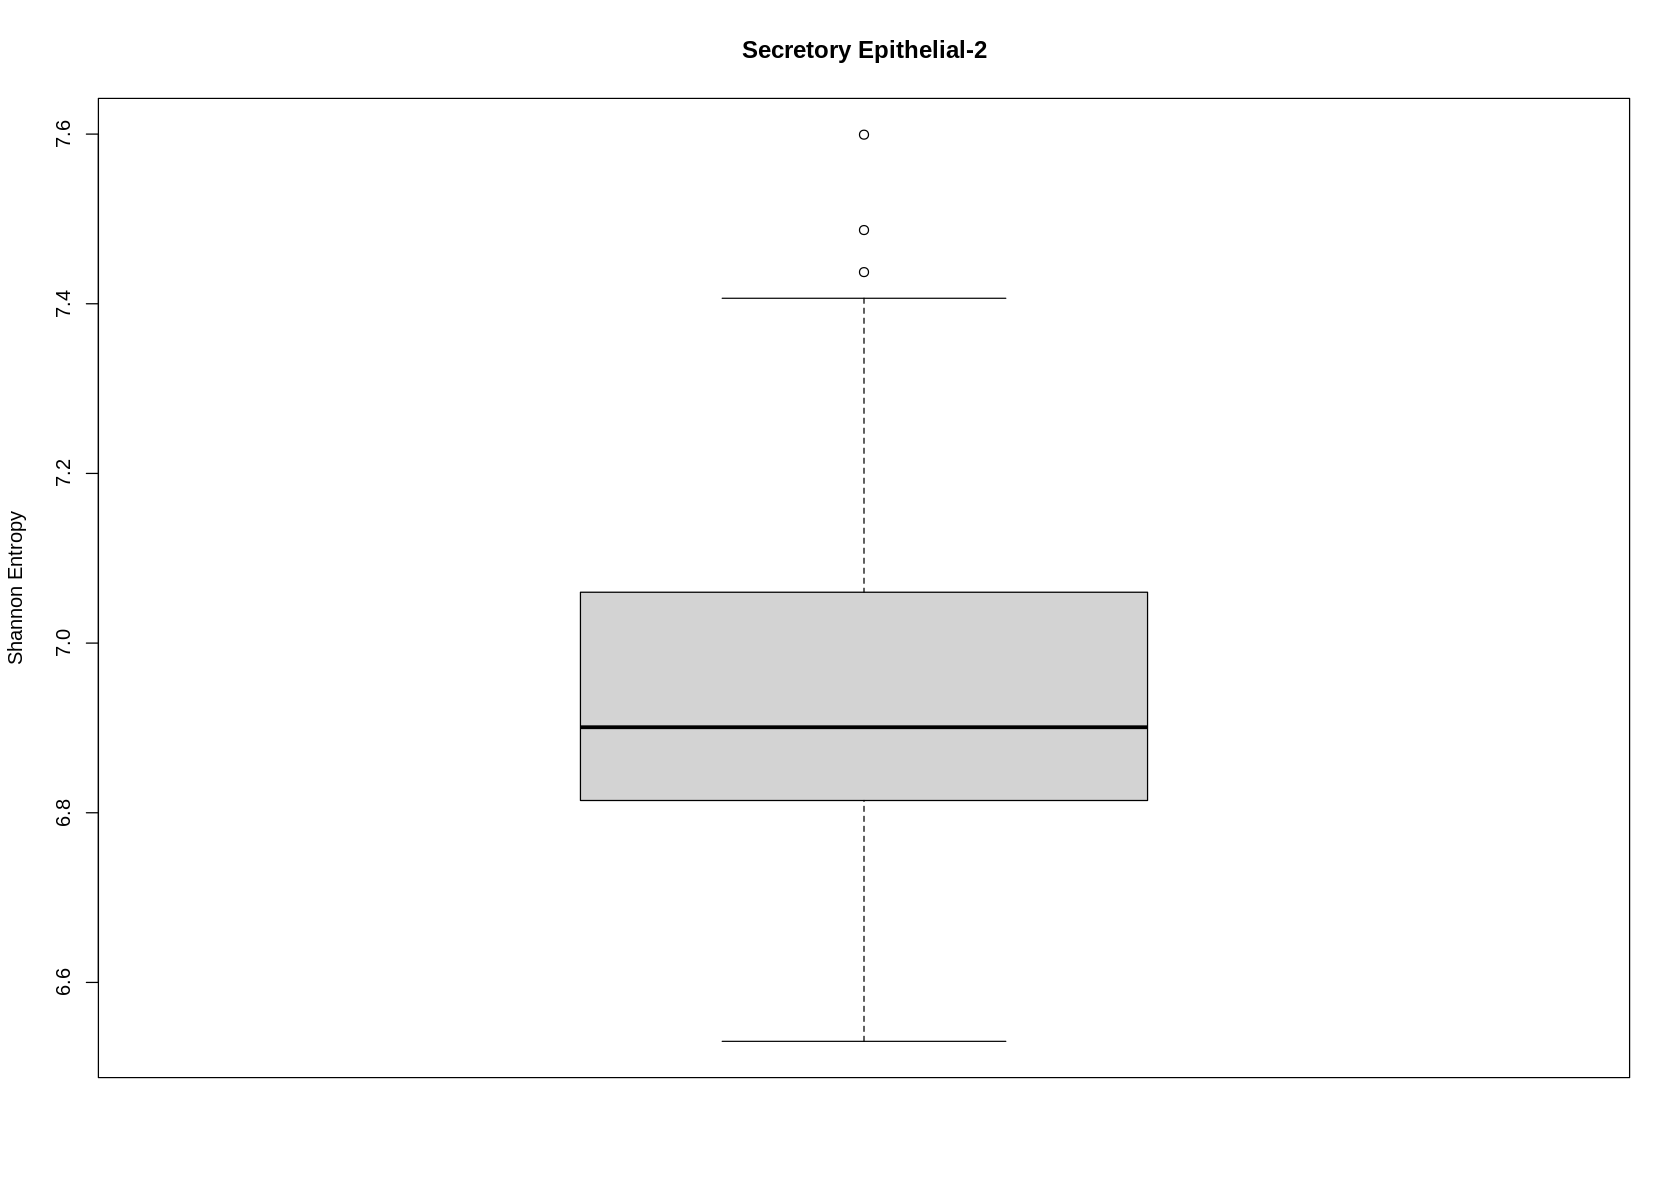

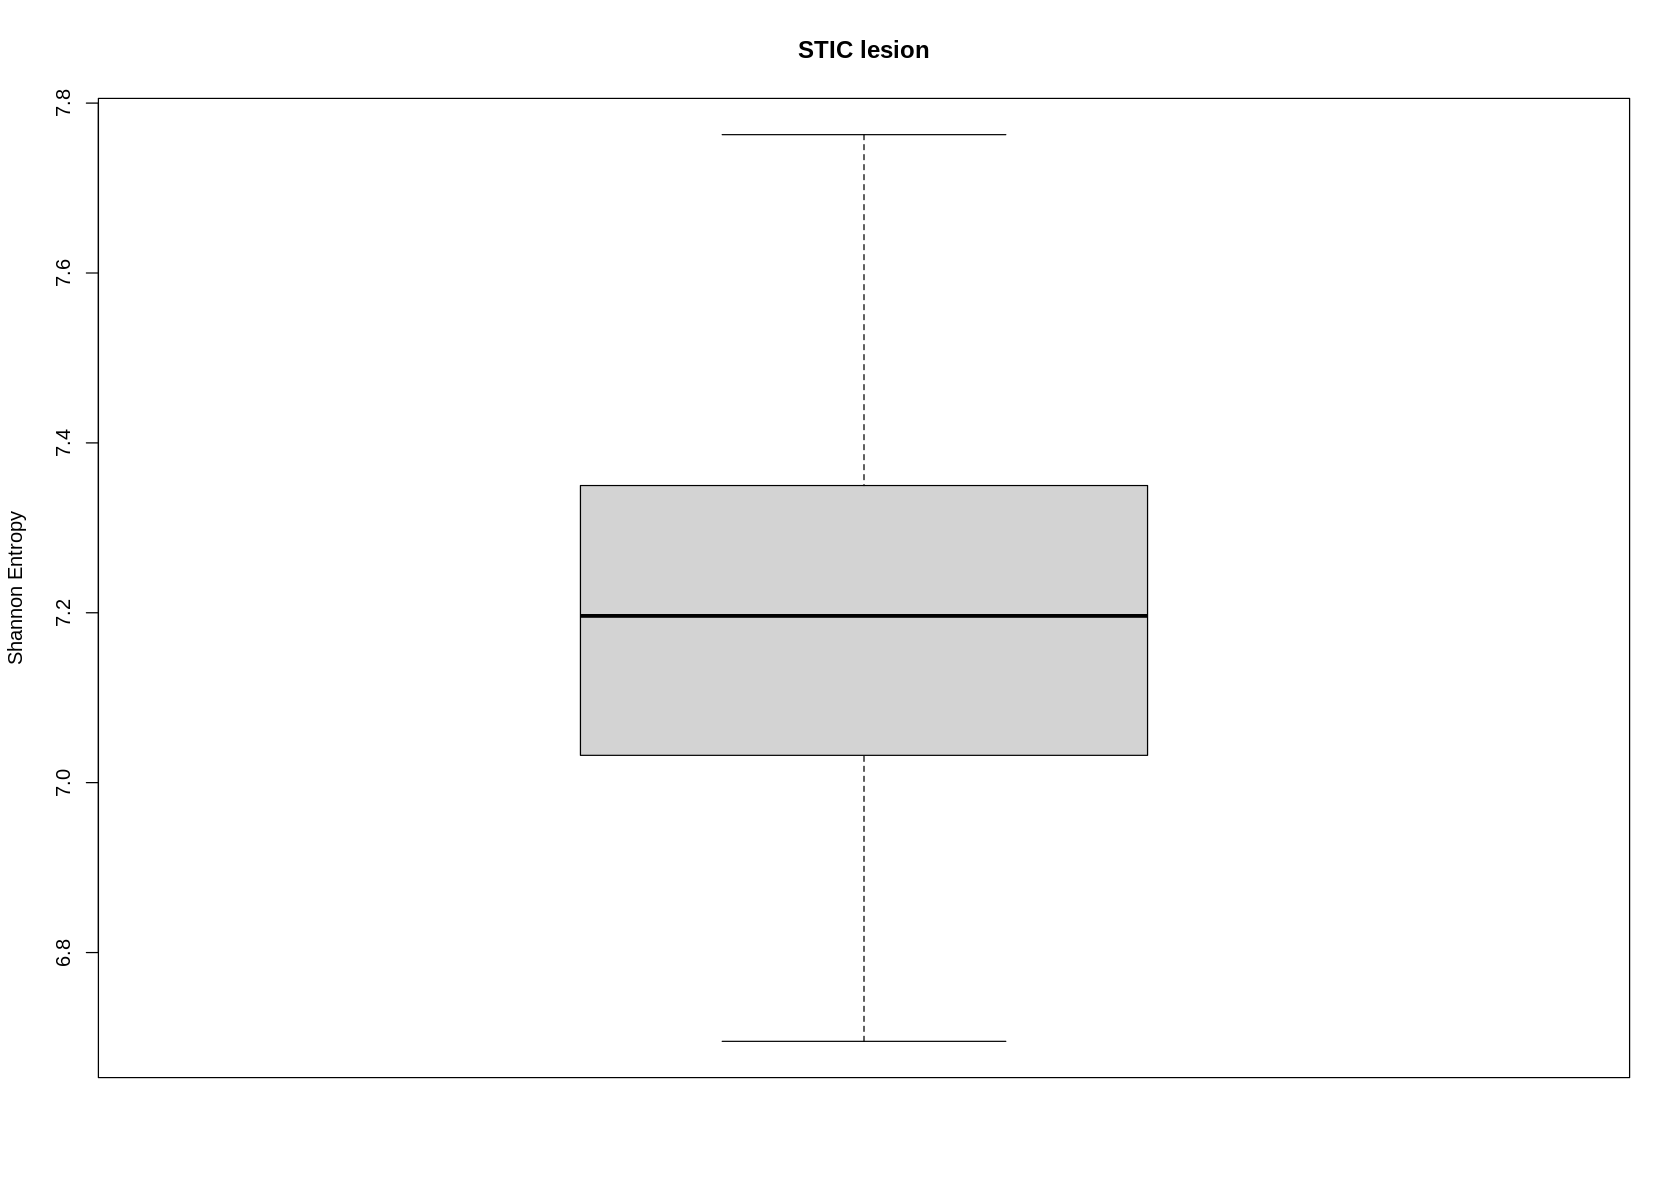

In [ ]:
colnames(compilation_SE1) <- c(paste0("f", 1:50), "Entropy")
boxplot(compilation_SE1$Entropy,
        main="Secretory Epithelial-1",
        ylab="Shannon Entropy")

colnames(compilation_SE2) <- c(paste0("f", 1:50), "Entropy")
boxplot(compilation_SE2$Entropy,
        main="Secretory Epithelial-2",
        ylab="Shannon Entropy")

colnames(compilation_STIC) <- c(paste0("f", 1:50), "Entropy")
boxplot(compilation_STIC$Entropy,
        main="STIC lesion",
        ylab="Shannon Entropy")

Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


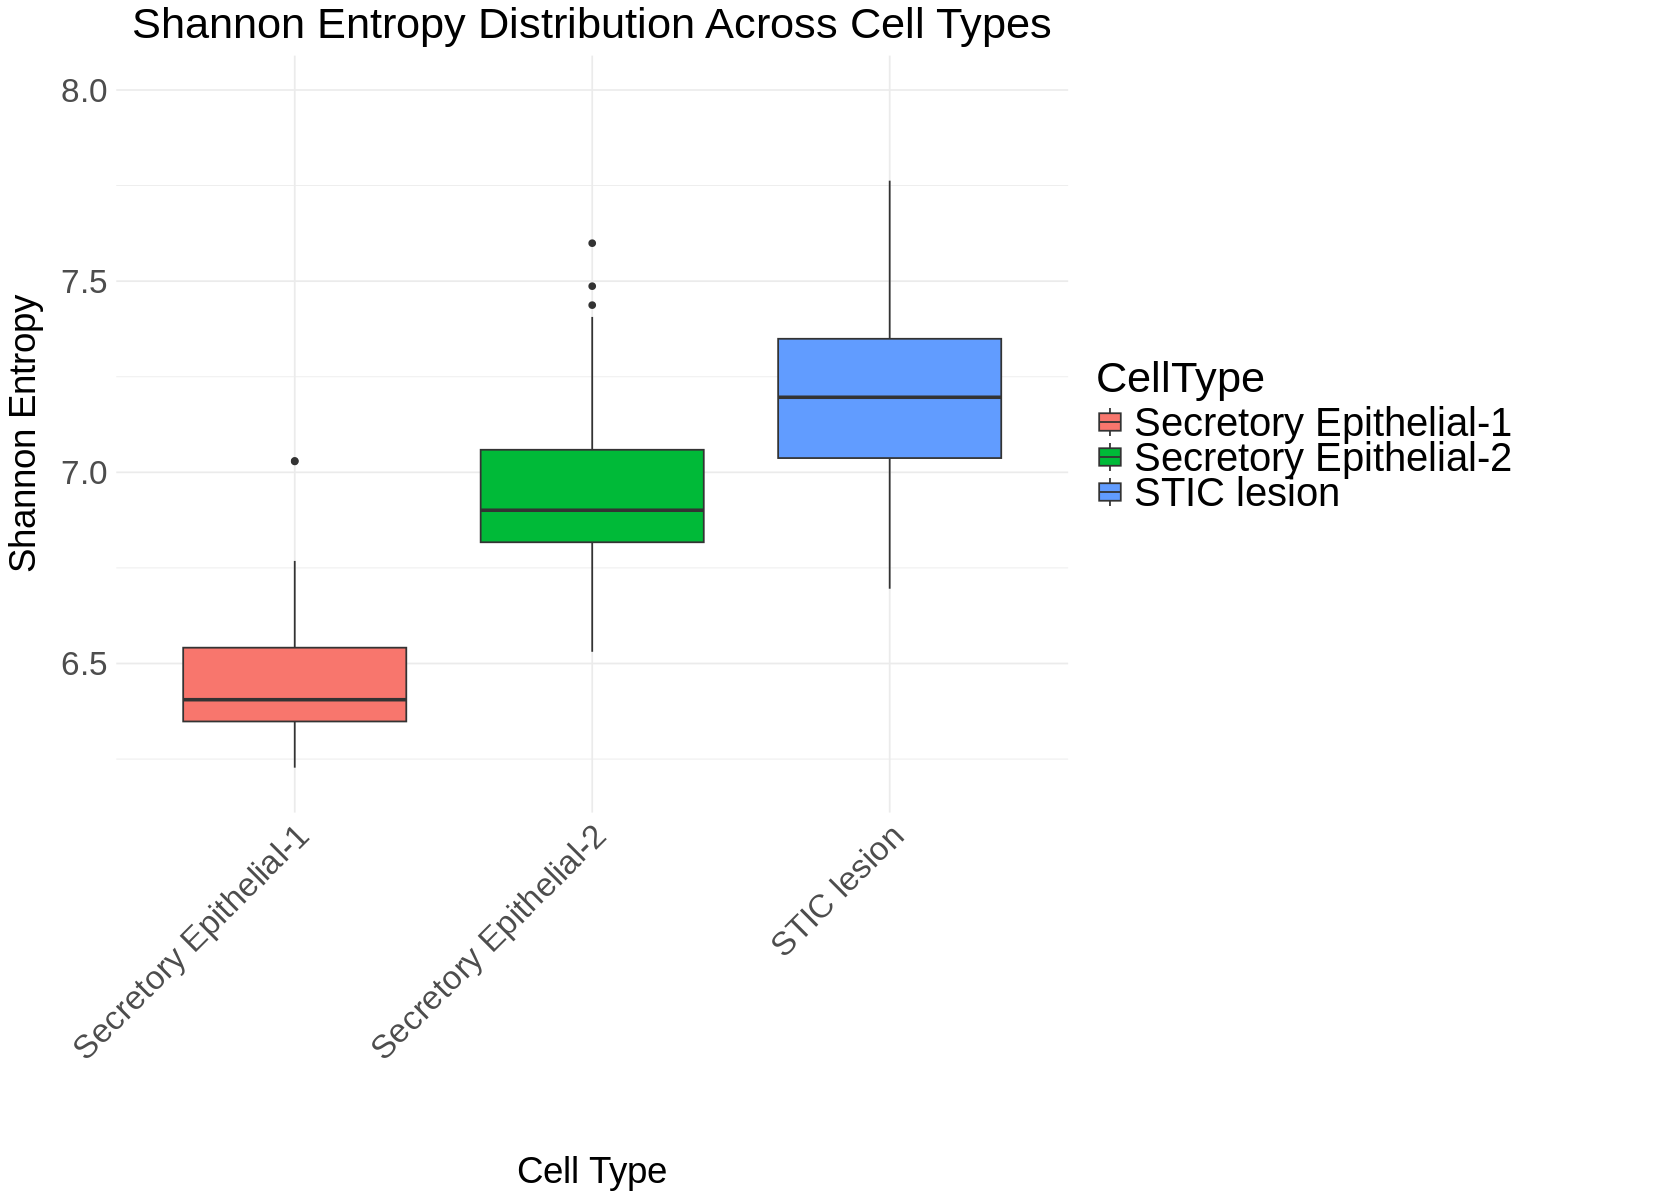

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)
library(ggplot2)


combined_SE1 <- data.frame(Entropy = compilation_SE1$Entropy, CellType = "Secretory Epithelial-1")
combined_SE2 <- data.frame(Entropy = compilation_SE2$Entropy, CellType = "Secretory Epithelial-2")
combined_STIC <- data.frame(Entropy = compilation_STIC$Entropy, CellType = "STIC lesion")

all_entropy_data <- rbind(combined_SE1, combined_SE2, combined_STIC)


combined_plot <- ggplot(all_entropy_data, aes(x = CellType, y = Entropy, fill = CellType)) +
  geom_boxplot() +
  scale_y_continuous(limits = c(6.2, 8)) +
  labs(
    title = "Shannon Entropy Distribution Across Cell Types",
    x = "Cell Type",
    y = "Shannon Entropy"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    axis.text.y = element_text(size = 20),
    axis.title.x = element_text(size = 22),
    axis.title.y = element_text(size = 22),
    plot.title = element_text(hjust = 0.5, size = 26),
    legend.text = element_text(size = 24),
    legend.title = element_text(size = 26)
  )

# Print the combined plot
print(combined_plot)

**Figure Explanation**:

The boxplot illustrates the distribution of Shannon entropy values calculated for Secretory Epithelial-1, Secretory Epithelial-2, and STIC lesions via a bootstrapped gene sampling approach (n=100 iterations). The data reveals a distinct stepwise increase in transcriptional entropy. Secretory Epithelial-1 exhibits the lowest entropy, suggesting it is the most stable and differentiated phenotype. Secretory Epithelial-2 shows intermediate entropy, potentially indicating a more plastic or activated functional state. STIC lesions display the highest entropy, indicating a highly disordered transcriptomic state. High entropy is a sign of increased cellular plasticity and dedifferentiation, supporting the hypothesis that STIC cells have acquired stem-like properties characteristic of cancer precursors capable of originating HGOC.

### **Bayesian Analysis**:

In this step, we move beyond visual comparison to statistically evaluate the differences in transcriptomic diversity between cell types using a Bayesian framework. Utilizing the BayesFactor package, we perform Bayesian t-tests to estimate the posterior distributions of the mean Shannon entropy (μ) for Secretory Epithelial-1, Secretory Epithelial-2, and STIC lesions, as well as for the differences between these groups. Unlike traditional frequentist approaches, this method generates a distribution of credible values for the difference in means, which we visualize using histograms. To quantify the significance of these differences, we calculate the 95% High Density Interval (HDI) using the HDInterval package; if the HDI for the difference between two groups (e.g., SE2 vs. STIC) excludes zero (indicated by the dashed lines), it provides strong statistical evidence that the distinct entropy levels represent a genuine biological shift in cellular complexity.

In [ ]:
install.packages("BayesFactor")
library(BayesFactor)

bayes_SE1 <-  ttestBF(x= compilation_SE1$Entropy, posterior = TRUE ,iterations = 1000)

bayes_STIC <-  ttestBF(x= compilation_STIC$Entropy, posterior = TRUE ,iterations = 1000)

bayes_SE1_STIC <-  ttestBF(x= compilation_STIC$Entropy, y=compilation_SE1$Entropy,
                           posterior = TRUE ,iterations = 1000, paired = TRUE)

post_SE1<- data.frame(mu = as.numeric(bayes_SE1[,"mu"]), Posterior = 'Secretory Epithelial-1')
post_STIC<- data.frame(mu = as.numeric(bayes_STIC[,"mu"]), Posterior = 'STIC lesion')
post_SE1_STIC<- data.frame(mu = as.numeric(bayes_SE1_STIC[,"mu"]), Posterior = 'Secretory Epithelial-1 & STIC lesion')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("HDInterval")
library(HDInterval)
ci95<-hdi(post_SE1_STIC)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


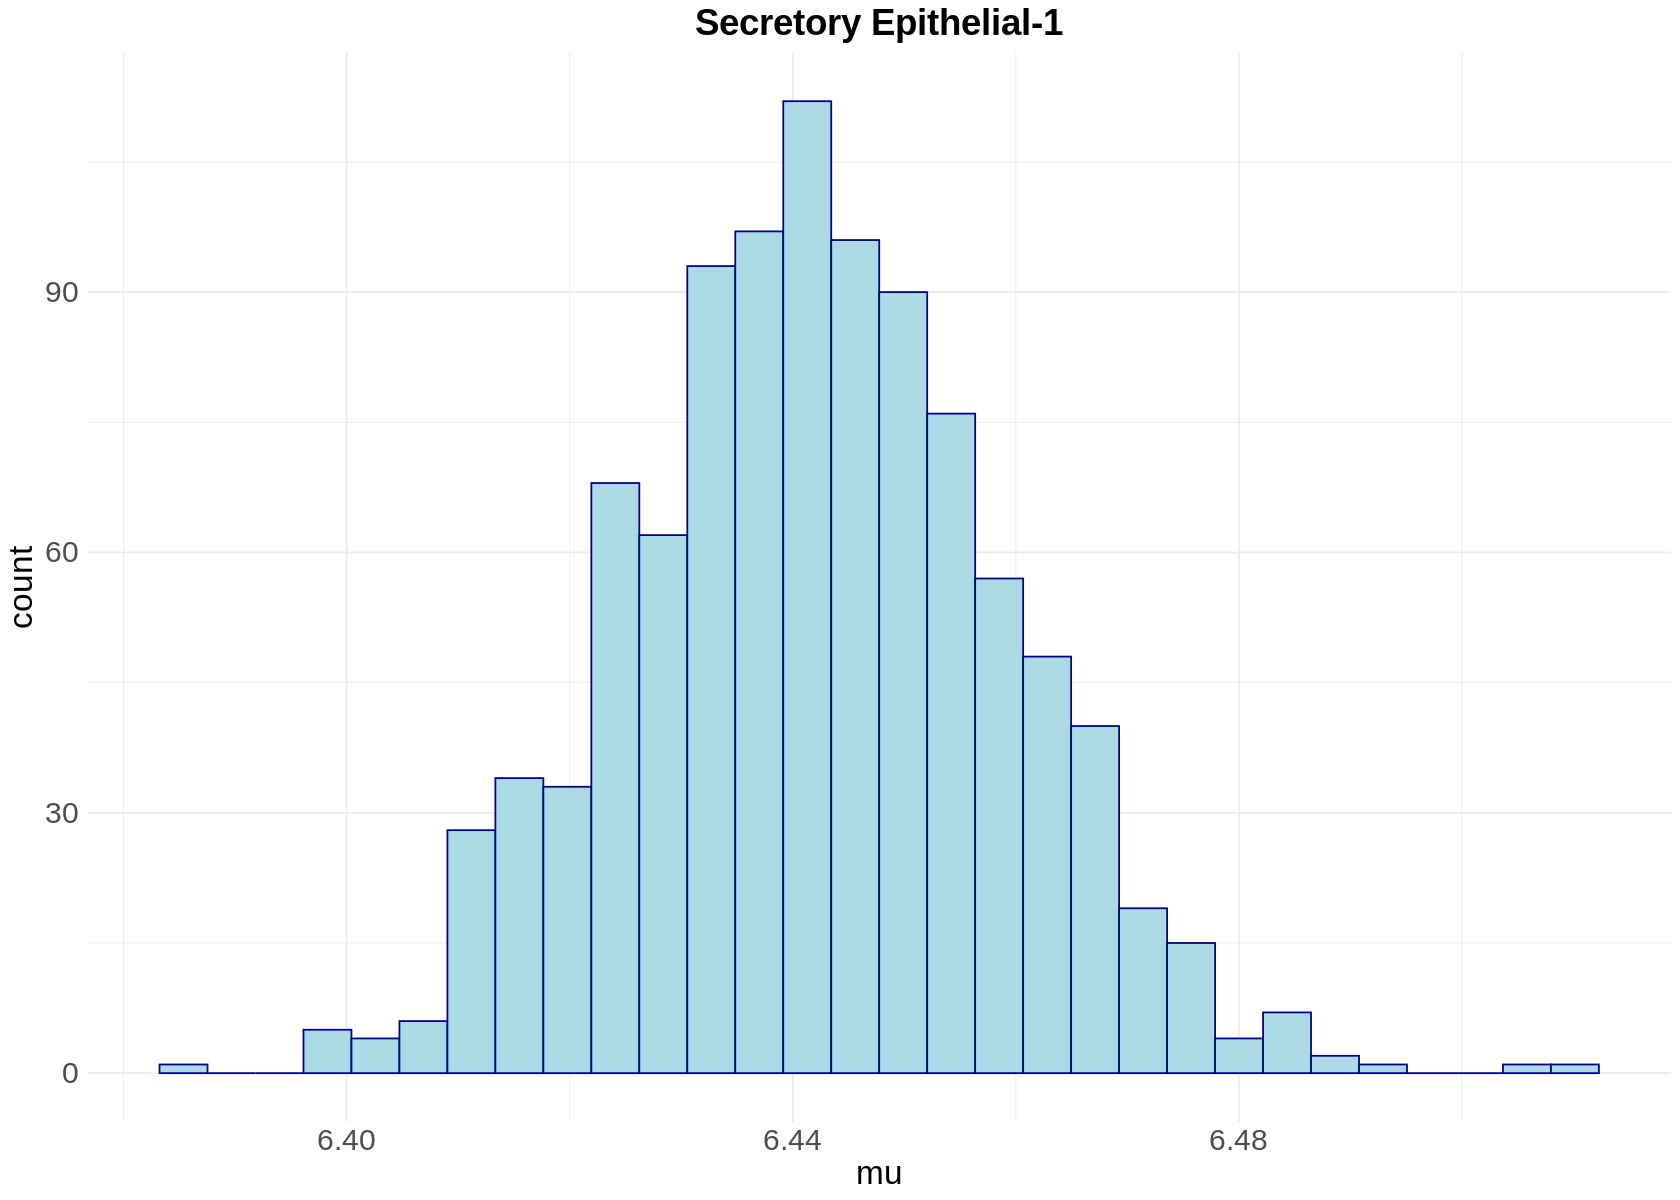

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


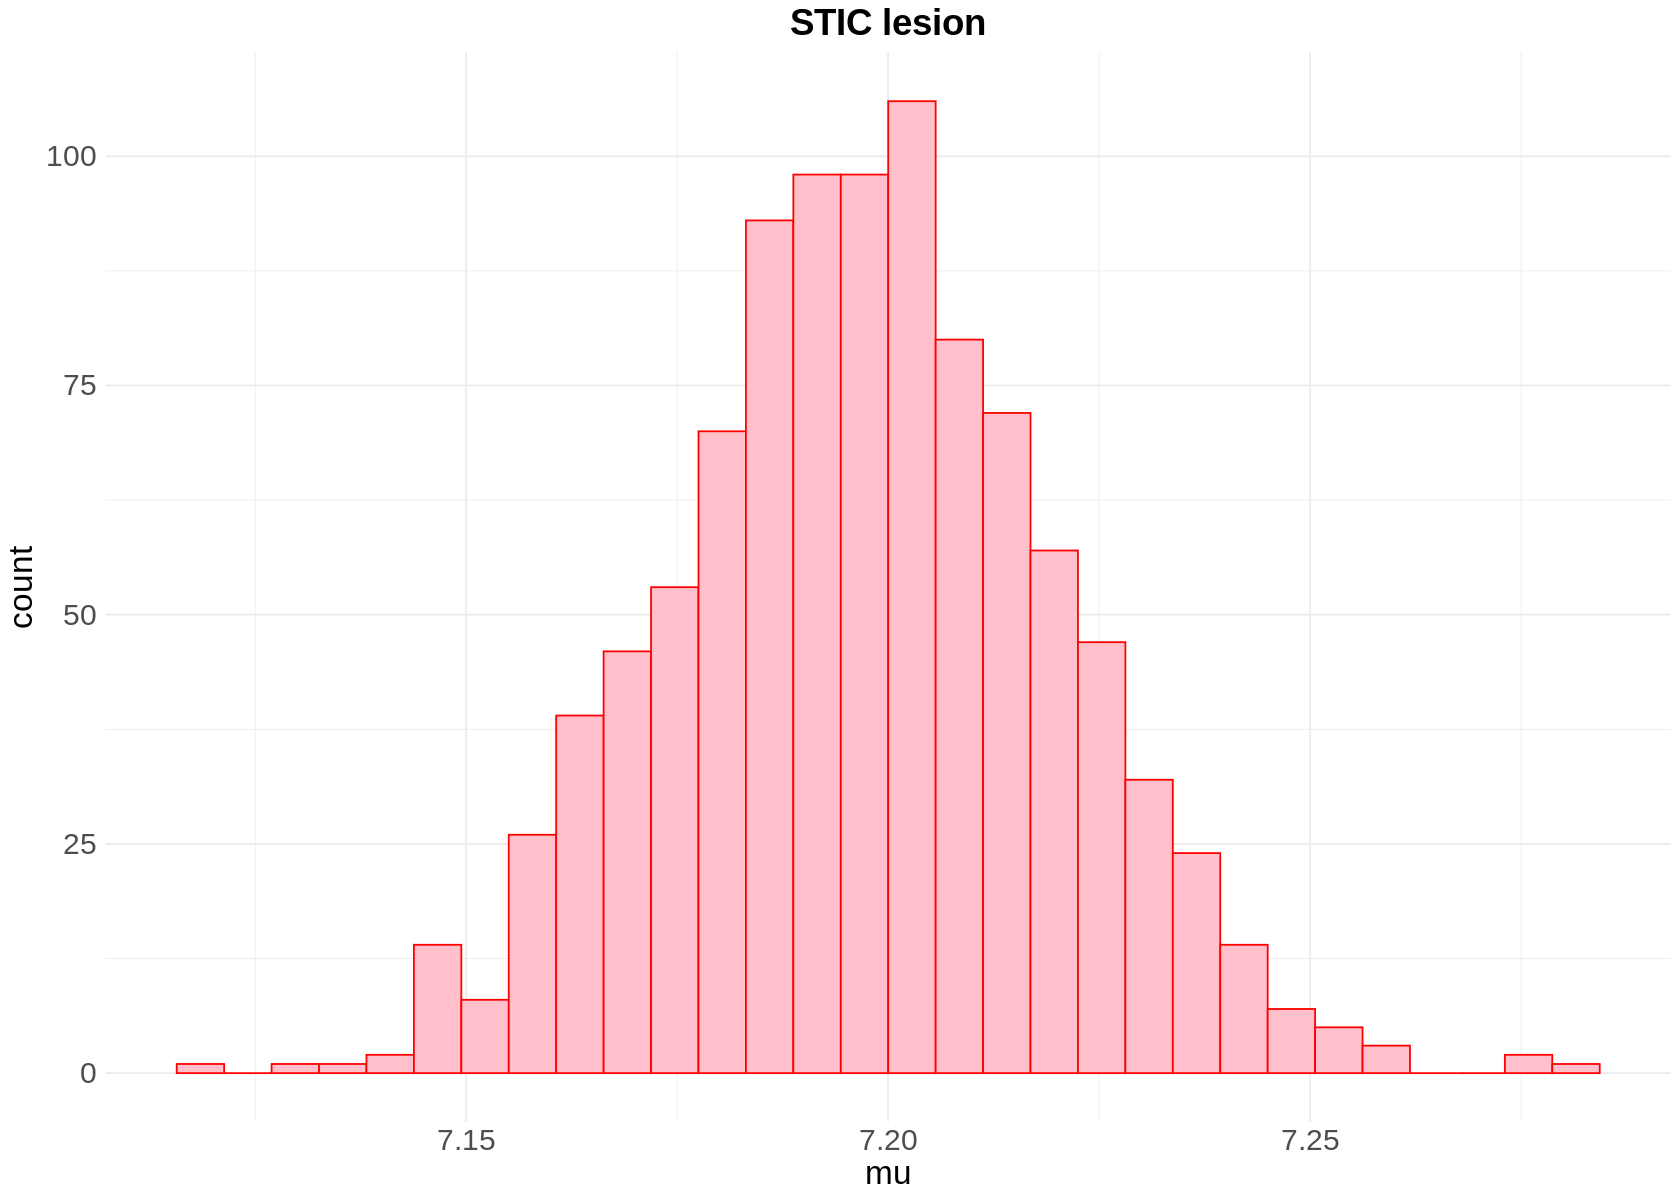

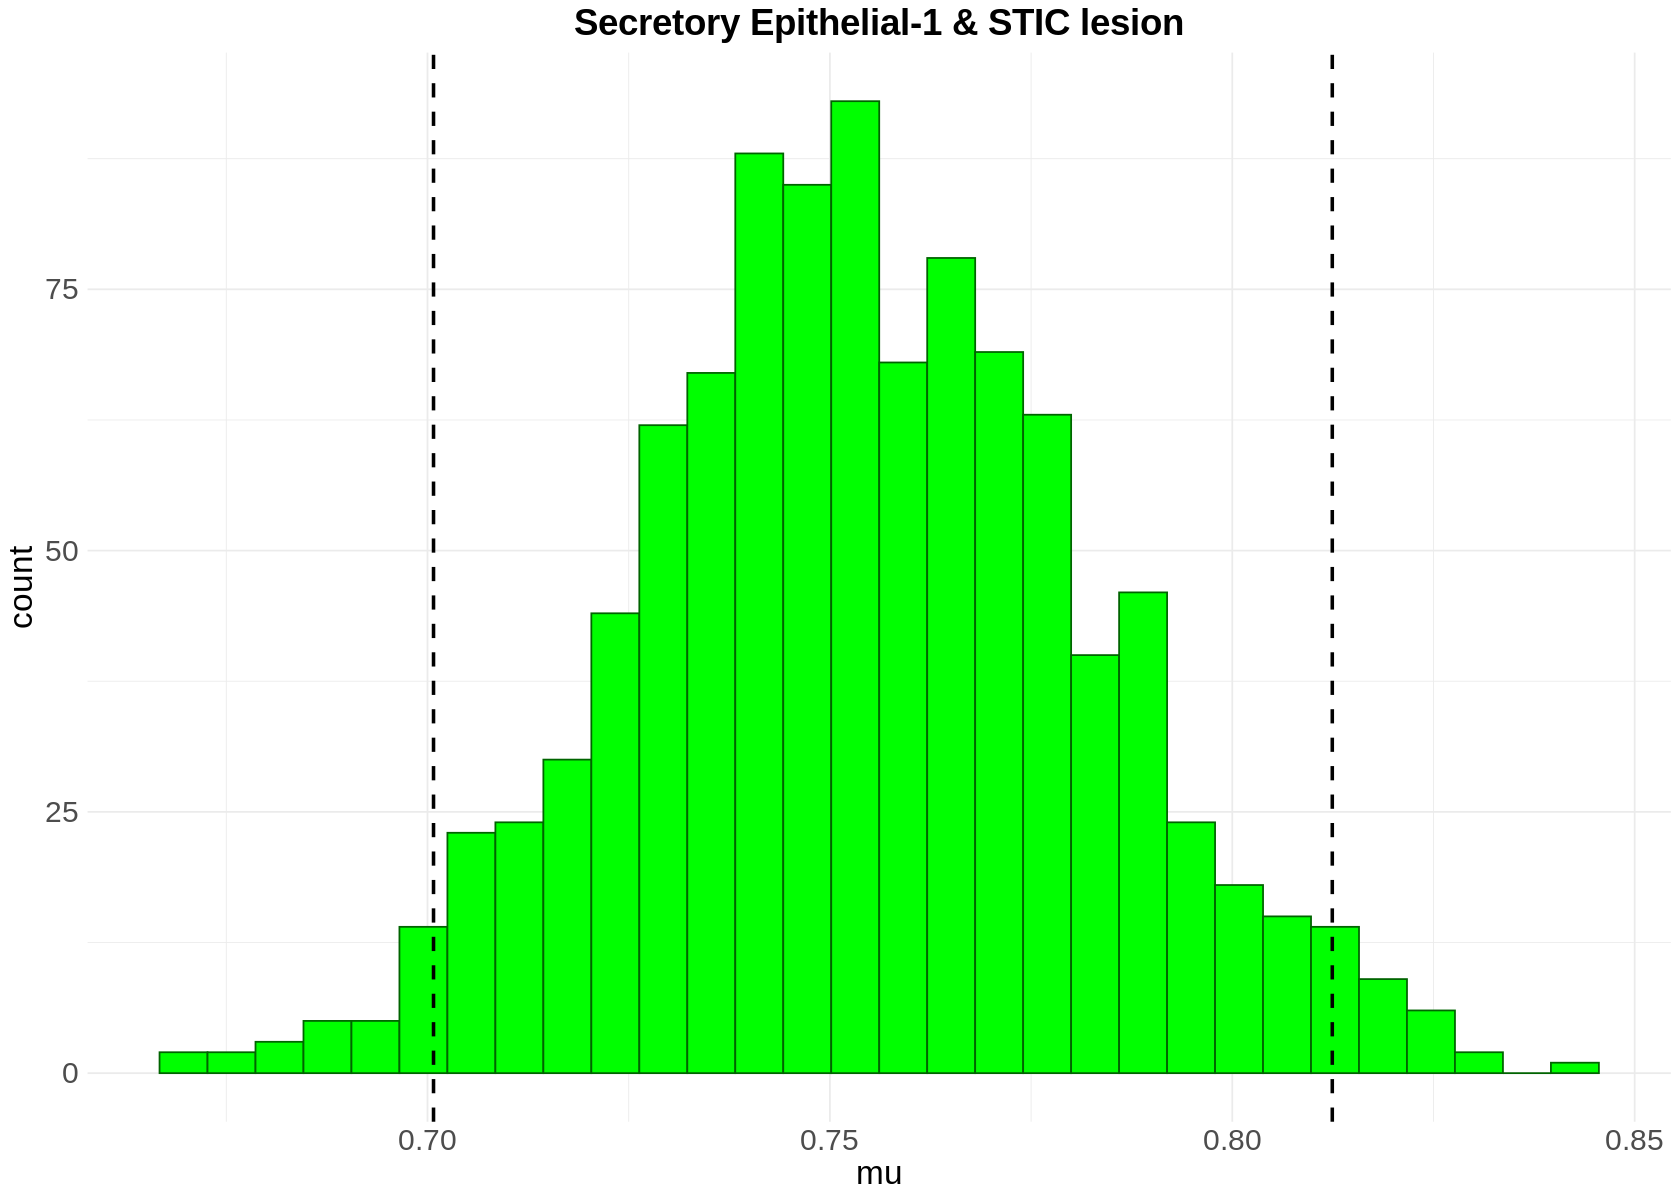

In [ ]:
install.packages("ggplot2")
library(ggplot2)


custom_theme <- theme_minimal() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(size = 22, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 18)
  )

plot_post_SE1 <- ggplot(post_SE1, aes(x=mu))+
  geom_histogram(color="darkblue", fill="lightblue") +
  ggtitle("Secretory Epithelial-1") +
  custom_theme

plot_post_STIC <- ggplot(post_STIC, aes(x=mu))+
  geom_histogram(color="red", fill="pink") +
  ggtitle("STIC lesion") +
  custom_theme

plot_post_SE1_STIC <- ggplot(post_SE1_STIC, aes(x=mu))+
  geom_histogram(color="darkgreen", fill="green") +
  geom_vline(xintercept = as.numeric(ci95[1:2]), linetype="dashed",
             color = "black", size=1, ) +
  ggtitle("Secretory Epithelial-1 & STIC lesion") +
  custom_theme


plot_post_SE1
plot_post_STIC
plot_post_SE1_STIC

# **Trying a different combination of the 2 cell types**

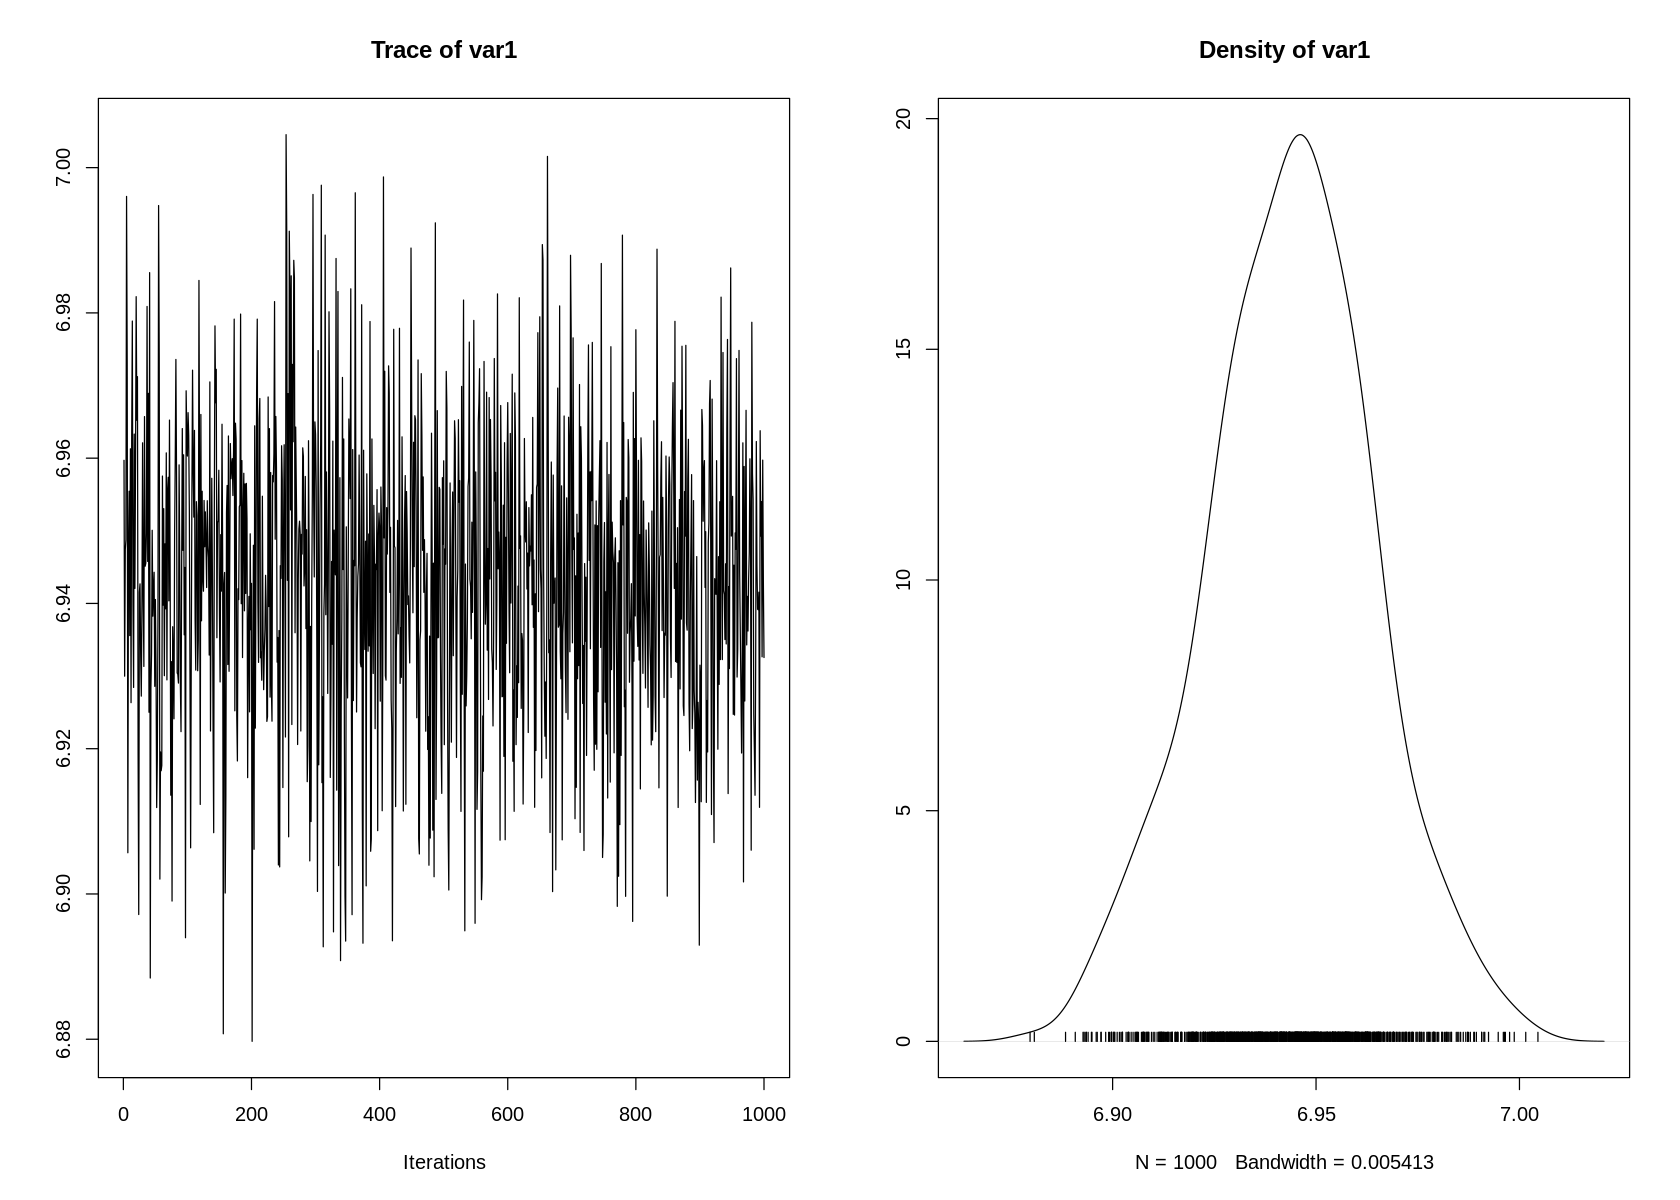

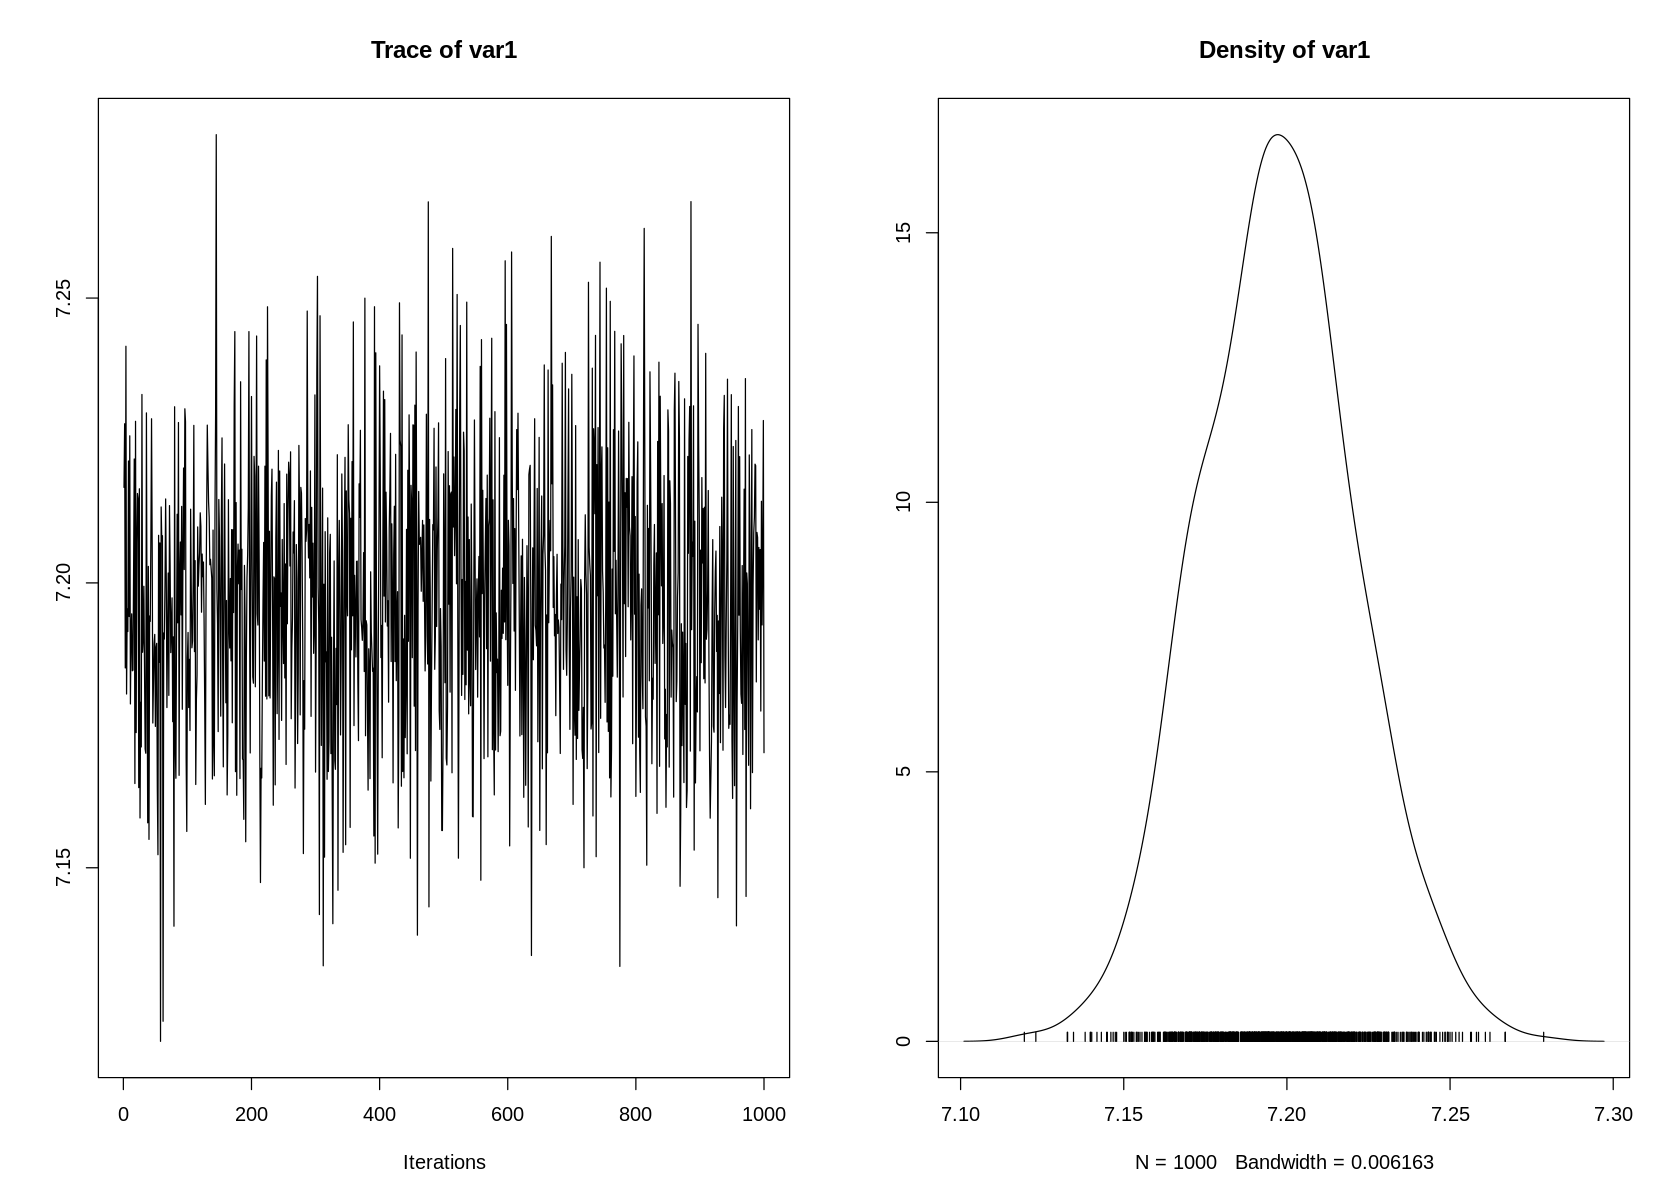

In [ ]:
bayes_SE2 <-  ttestBF(x= compilation_SE2$Entropy, posterior = TRUE ,iterations = 1000)

plot(bayes_SE2[,"mu"])

bayes_STIC <-  ttestBF(x= compilation_STIC$Entropy, posterior = TRUE ,iterations = 1000)

plot(bayes_STIC[,"mu"])

bayes_SE2_STIC <-  ttestBF(x= compilation_SE2$Entropy, y=compilation_STIC$Entropy,
                           posterior = TRUE ,iterations = 1000, paired = TRUE)

post_SE2<- data.frame(mu = as.numeric(bayes_SE2[,"mu"]), Posterior = 'Secretory Epithelial-2')
post_STIC<- data.frame(mu = as.numeric(bayes_STIC[,"mu"]), Posterior = 'STIC lesion')
post_SE2_STIC<- data.frame(mu = as.numeric(bayes_SE2_STIC[,"mu"]), Posterior = 'Secretory Epithelial-2 & STIC lesion')


library(HDInterval)
ci95<-hdi(post_SE2_STIC)

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


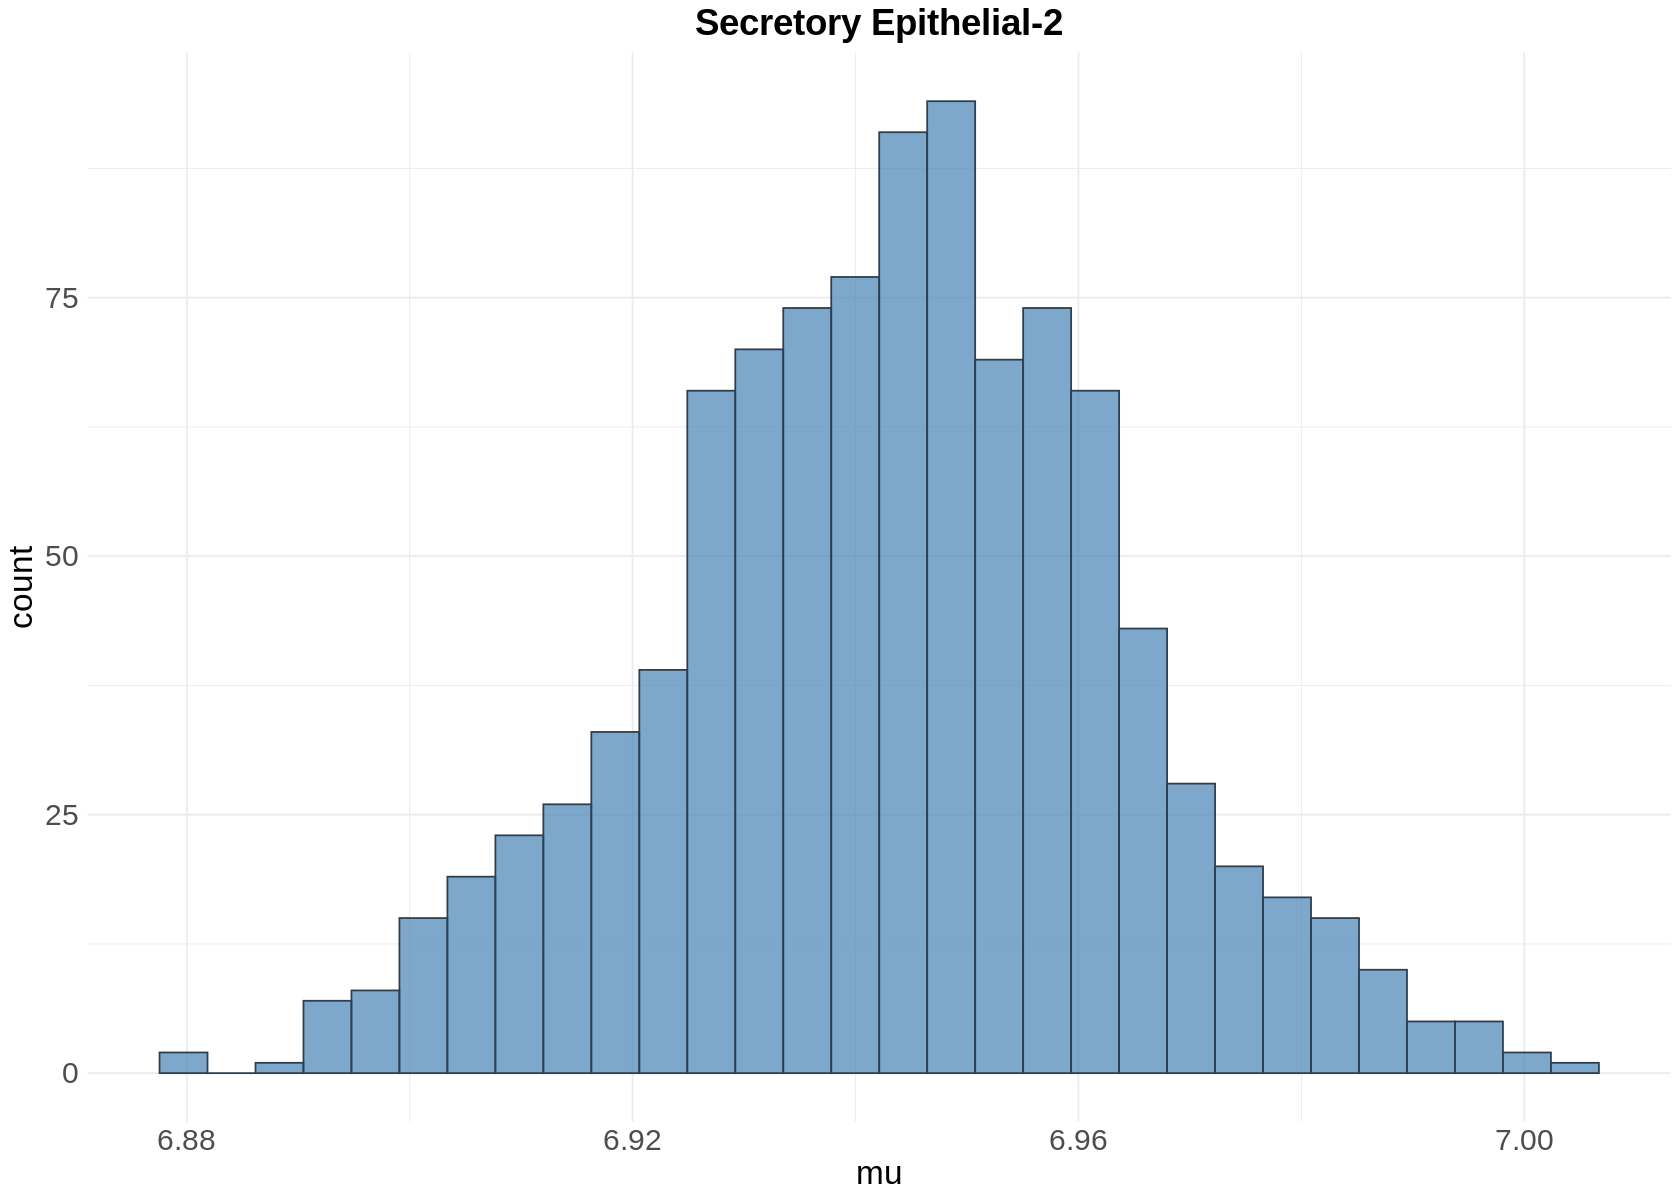

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_vline()`).”


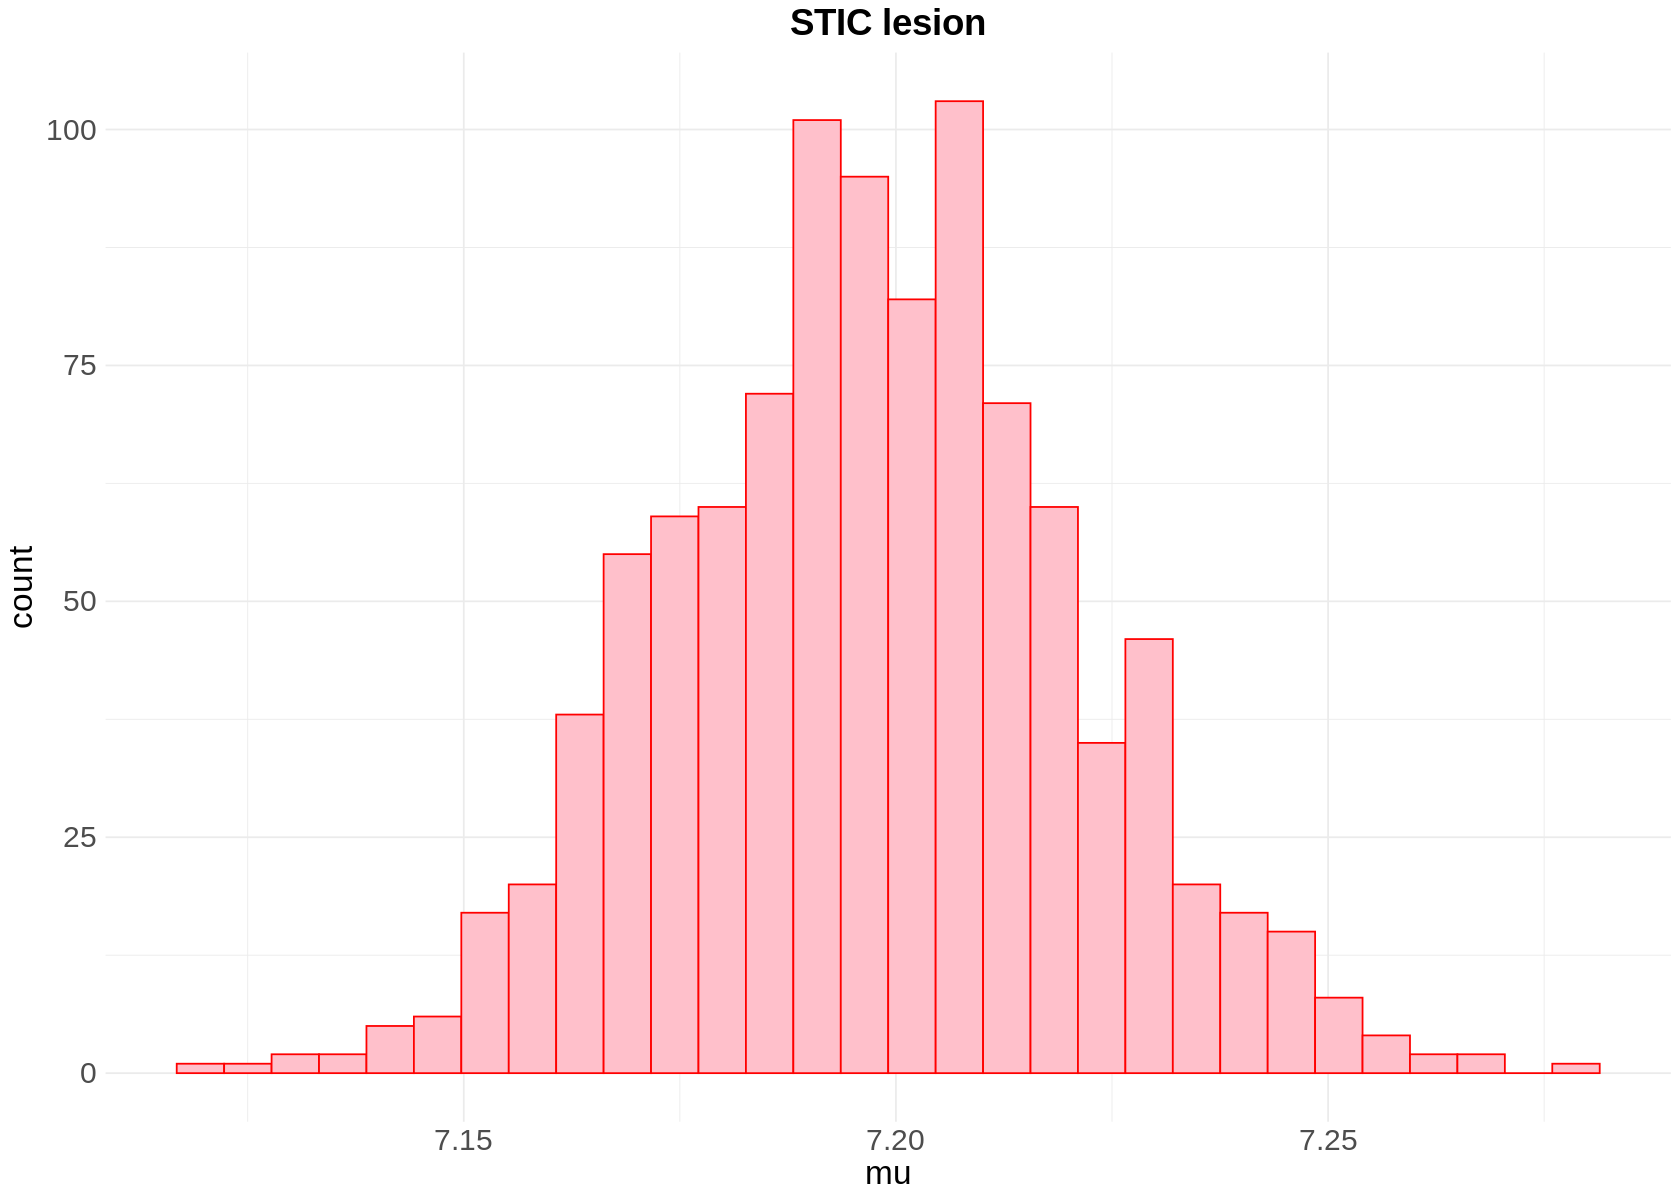

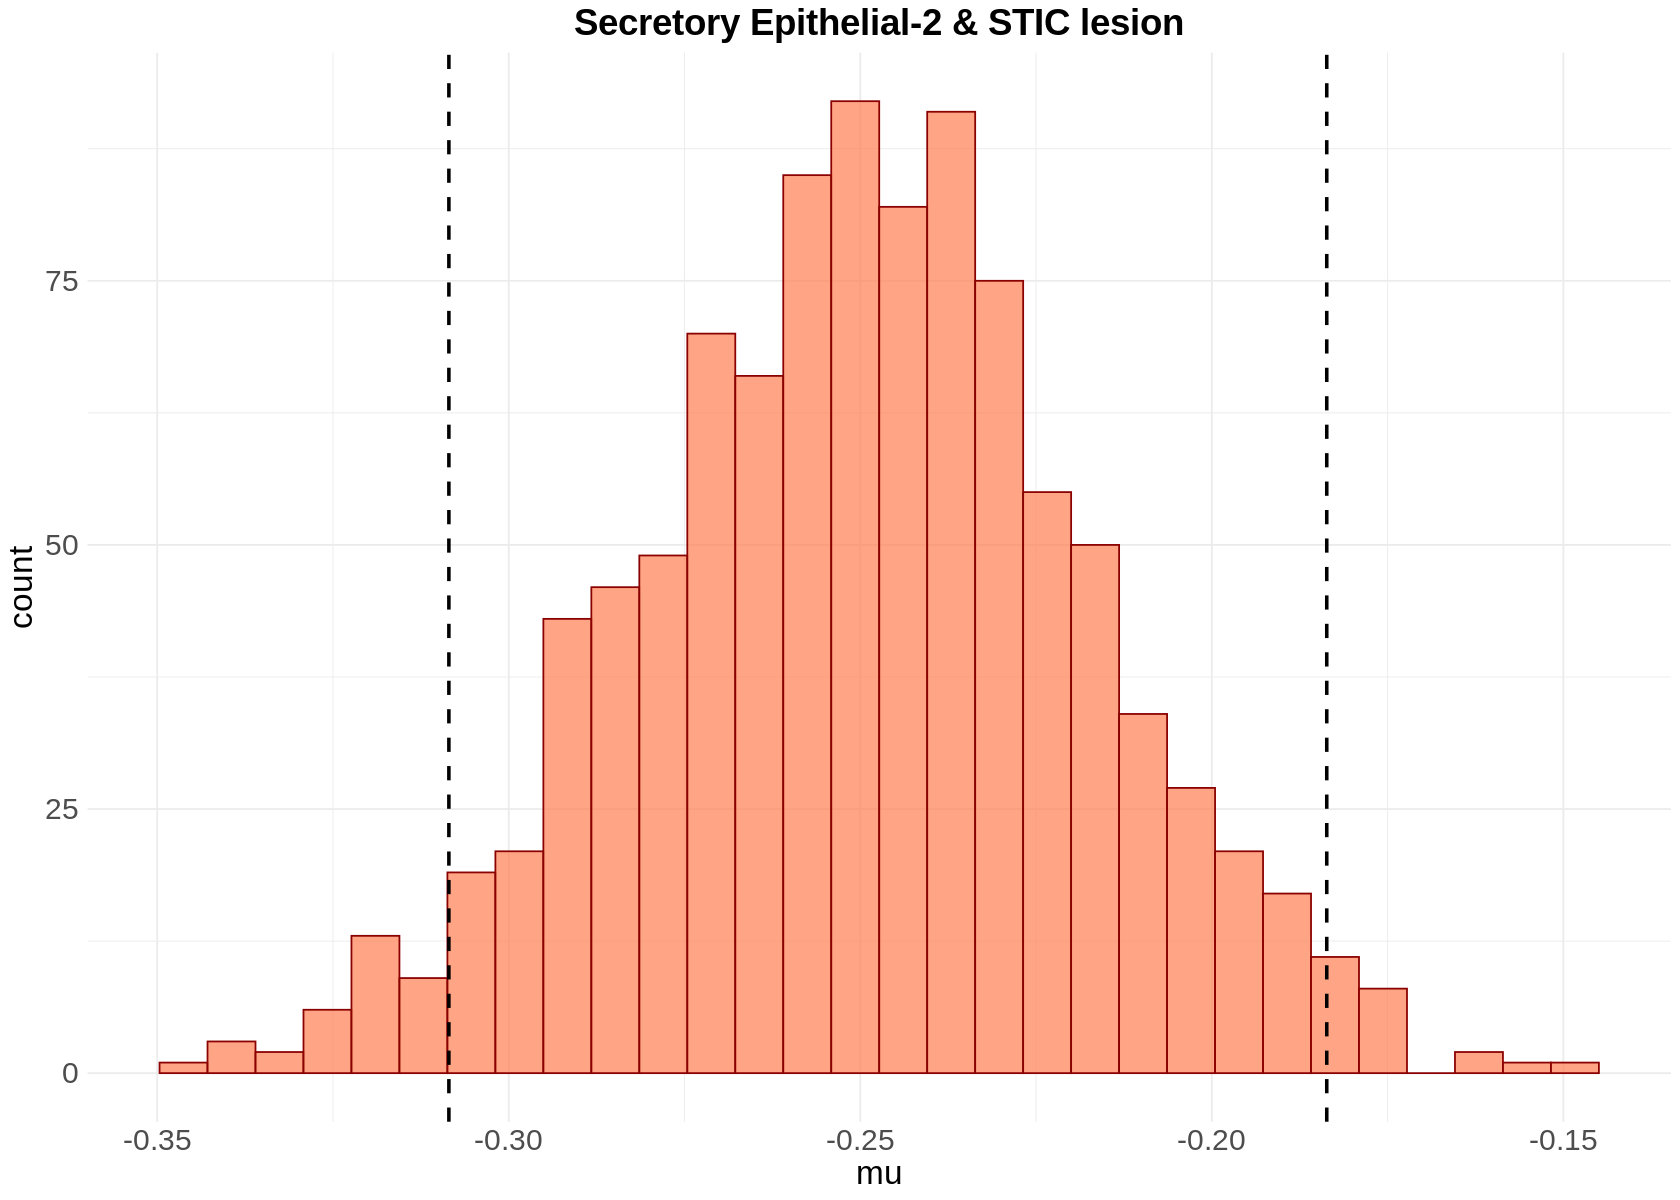

In [ ]:
library(ggplot2)


custom_theme <- theme_minimal() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(size = 22, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 18)
  )

plot_post_SE2 <- ggplot(post_SE2, aes(x=mu)) +
  geom_histogram(color="#2c3e50", fill="steelblue", alpha=0.7) +
  ggtitle("Secretory Epithelial-2") +
  custom_theme

plot_post_STIC <- ggplot(post_STIC, aes(x=mu))+
  geom_histogram(color="red", fill="pink") +
  ggtitle("STIC lesion") +
  custom_theme

plot_post_SE2_STIC <- ggplot(post_SE2_STIC, aes(x=mu)) +
  geom_histogram(color="#8b0000", fill="coral", alpha=0.7) +
  geom_vline(xintercept = as.numeric(ci95), linetype="dashed",
             color = "black", size=1) +
  ggtitle("Secretory Epithelial-2 & STIC lesion") +
  custom_theme

plot_post_SE2
plot_post_STIC
plot_post_SE2_STIC

In [ ]:
plot_post_SE2 <- ggplot(post_SE2, aes(x=mu)) +
  geom_histogram(color="darkred", fill="indianred", alpha=0.7) +
  ggtitle("Secretory Epithelial-2") +
  custom_theme

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


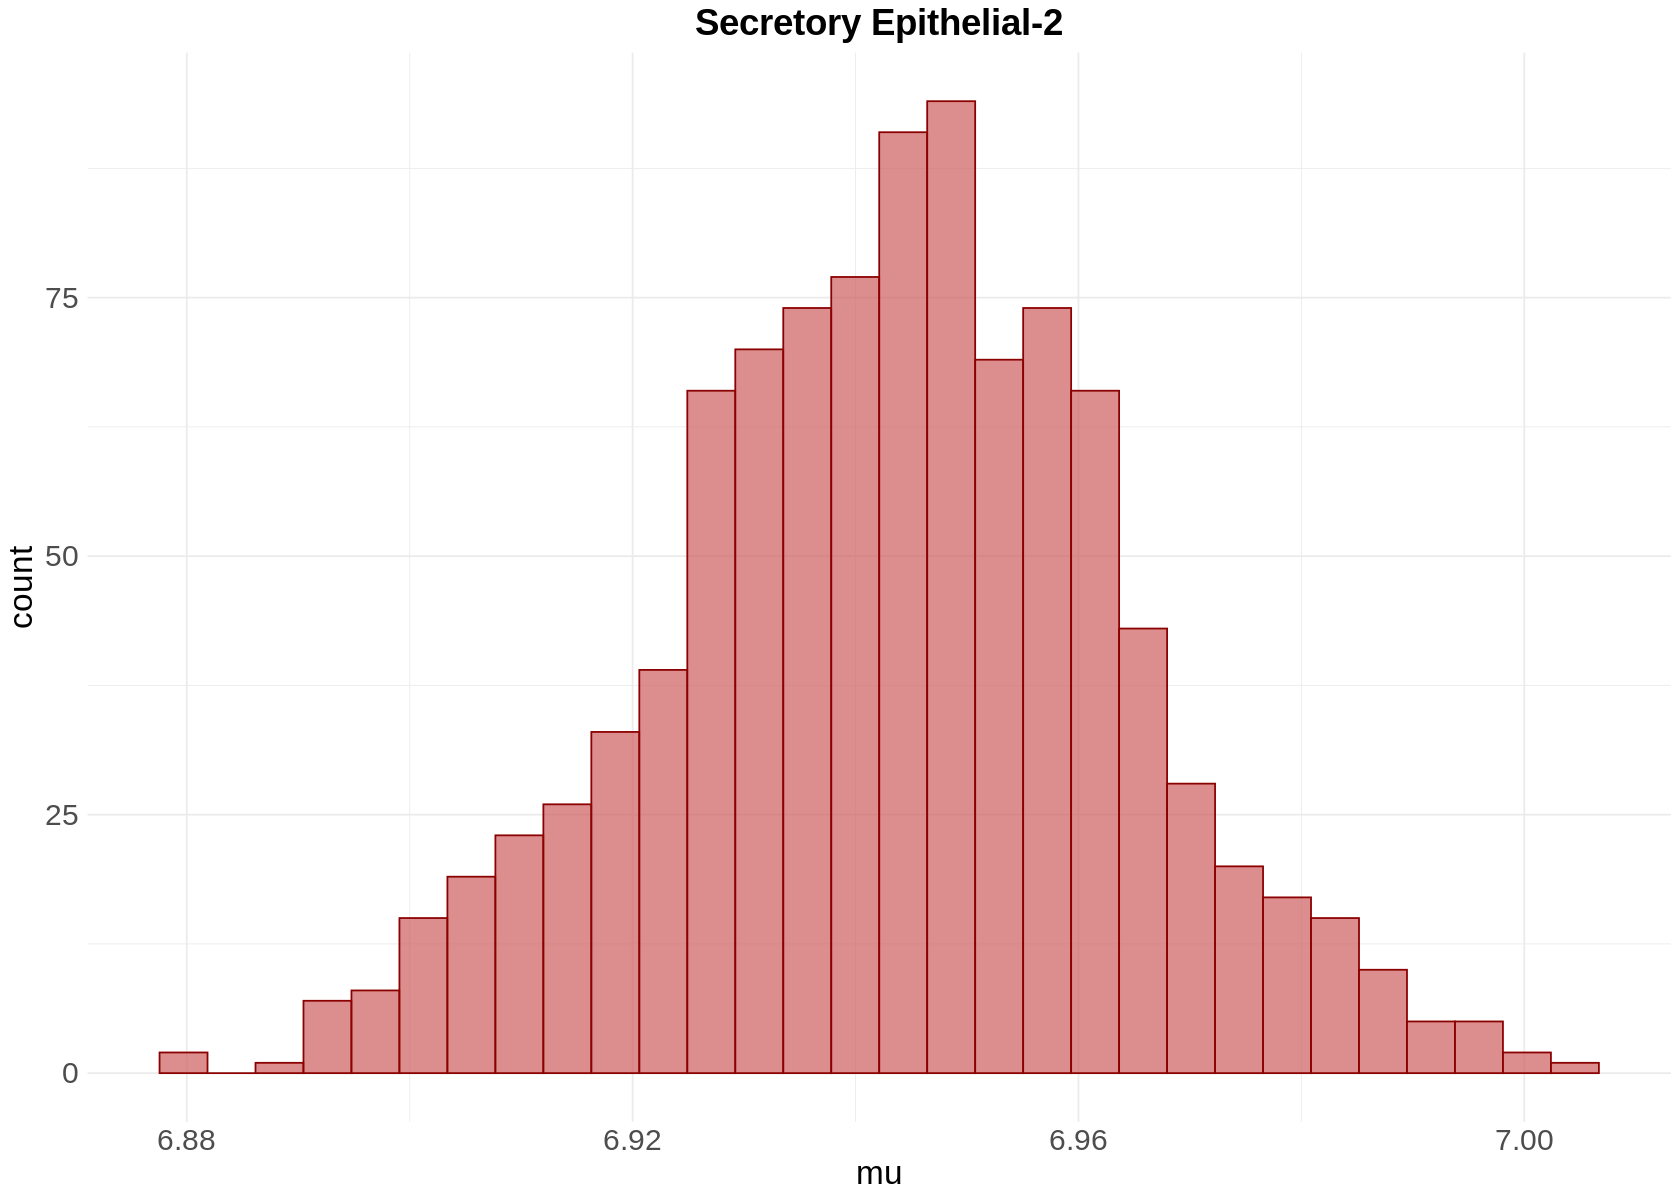

In [ ]:
plot_post_SE2

## Baysian Analysis Interpretation:

The histograms visualize the posterior probability distributions derived from the Bayesian t-tests (1,000 iterations):



*   The posterior distributions of the mean entropy for Secretory Epithelial-1 (blue)
*   The posterior distributions of the mean entropy for STIC lesions (pink)
*   The posterior distributions of the mean entropy for Secretory Epithelial-2 (brown)
*   The posterior distributions of the difference in means between the groups. The vertical dashed lines indicate the 95% High Density Interval (HDI):
    *   The comparison of STIC vs. Secretory Epithelial-1 yields a positive distribution (mean difference ≈+0.75), indicating STIC has significantly higher entropy (Green).
    *   The comparison of Secretory Epithelial-2 vs. STIC yields a negative distribution (mean difference ≈−0.25), confirming that Secretory Epithelial-2 (SE2) has significantly lower entropy than STIC.

**Interpretation**: In both comparisons, the 95% HDI strictly excludes zero, providing strong statistical evidence that STIC lesions possess systematically higher transcriptional disorder compared to both benign epithelial states. This validates the gradient of plasticity hypothesized to drive the initiation of High-Grade Serous Ovarian Carcinoma.






